In [1]:
!pip install beautifulsoup4 lxml

In [4]:
from bs4 import BeautifulSoup

In [6]:
dir(BeautifulSoup)

['ASCII_SPACES',
 'DEFAULT_BUILDER_FEATURES',
 'DEFAULT_INTERESTING_STRING_TYPES',
 'EMPTY_ELEMENT_EVENT',
 'END_ELEMENT_EVENT',
 'NO_PARSER_SPECIFIED_WARNING',
 'ROOT_TAG_NAME',
 'START_ELEMENT_EVENT',
 'STRING_ELEMENT_EVENT',
 '__bool__',
 '__call__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_strings',
 '_clone',
 '_decode_markup',
 '_event_stream',
 '_feed',
 '_find_all',
 '_find_one',
 '_format_tag',
 '_indent_string',
 '_is_xml',
 '_lastRecursiveChild',
 '_last_descenda

In [7]:
with open("htmls/page1.html") as f:
    content = f.read()

In [8]:
soup = BeautifulSoup(content, "html.parser")

In [42]:
for book in soup.find_all("article", class_="product_pod"):
    print("Book:", book.h3.a["title"])
    print("Price:", book.find("p", class_="price_color").text.split("£")[1])
    print("Price:", book.find("p", class_="price_color").text[3:])
    print()

Book: A Light in the Attic
Price: £51.77
Price: £51.77

Book: Tipping the Velvet
Price: £53.74
Price: £53.74

Book: Soumission
Price: £50.10
Price: £50.10

Book: Sharp Objects
Price: £47.82
Price: £47.82

Book: Sapiens: A Brief History of Humankind
Price: £54.23
Price: £54.23

Book: The Requiem Red
Price: £22.65
Price: £22.65

Book: The Dirty Little Secrets of Getting Your Dream Job
Price: £33.34
Price: £33.34

Book: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Price: £17.93
Price: £17.93

Book: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Price: £22.60
Price: £22.60

Book: The Black Maria
Price: £52.15
Price: £52.15

Book: Starving Hearts (Triangular Trade Trilogy, #1)
Price: £13.99
Price: £13.99

Book: Shakespeare's Sonnets
Price: £20.66
Price: £20.66

Book: Set Me Free
Price: £17.46
Price: £17.46

Book: Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
Price: £52.29
Price: £52.29

Book

In [50]:
items = []
for i in range(1, 51):
    # Read the html content
    with open(f"htmls/page{i}.html", encoding="utf-8") as f:
        content = f.read()

    # Parse the html content
    soup = BeautifulSoup(content, "html.parser")

    # Extract info
    for book in soup.select("article.product_pod"):
        title = book.h3.a["title"]
        price = book.select_one("p.price_color").text.split("£")[1]
        rating = book.select_one("p.star-rating")["class"][1]

        items.append([title, price, rating])
    

In [51]:
import pandas as pd
df = pd.DataFrame(items, columns=["Book Title", "Price (£)", "Rating"])

In [52]:
df

,Book Title,Price (£),Rating
0,A Light in the Attic,51.77,Three
1,Tipping the Velvet,53.74,One
2,Soumission,50.10,One
3,Sharp Objects,47.82,Four
4,Sapiens: A Brief History of Humankind,54.23,Five
...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,One
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,Four
997,A Spy's Devotion (The Regency Spies of London #1),16.97,Five
998,1st to Die (Women's Murder Club #1),53.98,One


In [53]:
df.to_csv("data.csv", index=False)

In [54]:
df

,Book Title,Price (£),Rating
0,A Light in the Attic,51.77,Three
1,Tipping the Velvet,53.74,One
2,Soumission,50.10,One
3,Sharp Objects,47.82,Four
4,Sapiens: A Brief History of Humankind,54.23,Five
...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,One
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,Four
997,A Spy's Devotion (The Regency Spies of London #1),16.97,Five
998,1st to Die (Women's Murder Club #1),53.98,One


In [59]:
# Books of each rating
df["Rating"].value_counts()

Rating
One      226
Three    203
Five     196
Two      196
Four     179
Name: count, dtype: int64

In [61]:
# Top 10 most expensive books 
df["Price (£)"] = df["Price (£)"].astype(float)
print(df.sort_values(by="Price (£)", ascending=False).head(10))

                                            Book Title  Price (£) Rating
648                 The Perfect Play (Play by Play #1)      59.99  Three
617                  Last One Home (New Beginnings #1)      59.98  Three
860                   Civilization and Its Discontents      59.95    Two
560                     The Barefoot Contessa Cookbook      59.92   Five
366                          The Diary of a Young Girl      59.90  Three
657  The Bone Hunters (Lexy Vaughan & Steven Macaul...      59.71  Three
133  Thomas Jefferson and the Tripoli Pirates: The ...      59.64    One
387                      Boar Island (Anna Pigeon #19)      59.48  Three
549  The Man Who Mistook His Wife for a Hat and Oth...      59.45   Four
393                          The Improbability of Love      59.45    One


In [62]:
# Saving data to excel file
df.to_excel("books.xlsx", index=False)

In [70]:
df.describe()

,Price (£)
count,1000.00000
mean,35.07035
std,14.44669
min,10.00000
25%,22.10750
50%,35.98000
75%,47.45750
max,59.99000


In [63]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Rating', ylabel='count'>

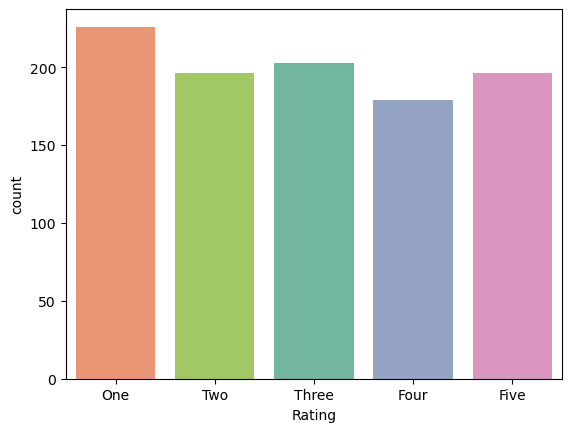

In [69]:
sns.countplot(
    x="Rating", 
    data=df, 
    hue="Rating", 
    palette="Set2", 
    order=["One", "Two", "Three", "Four", "Five"]
)

<Axes: xlabel='Price (£)', ylabel='Count'>

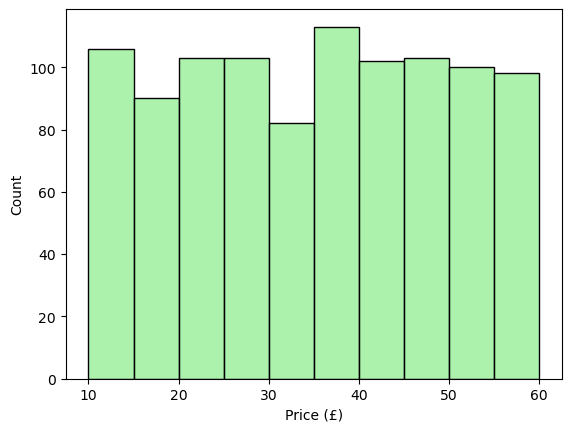

In [75]:
sns.histplot(
    x="Price (£)", 
    data=df,  
    bins=[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60], 
    color="lightgreen"
)